In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function for process different parameters for a given dataframe
def compute_parameters(df_arg):
    k = 5.67 * 10**-8  # stefen boltzman constant
    T_sun = 5800  # Kelvin

    T_sfc = df_arg[3]+273.15
    H = df_arg[19]  # sensible heat: Wm-2
    LE = df_arg[20]  # Latent heat: Wm-2

    Q_Lout = k * T_sfc**4  # Outgoing longwave radiation: Wm-2
    Rn = df_arg[18]  # Surface net solar radiation: Wm-2
    Q_s = Rn + Q_Lout  # Absorbed solar radiation: Wm-2

    J_QS = Q_s/T_sun  # : Entropy transfer due to absorbed solar radiation: Wm-2K-1
    sigma_QS = Q_s*(1/T_sfc - 1/T_sun)
    # Entropy production due to absorbed solar radiation: Wm-2K-1

    J_QL = -Q_Lout/T_sfc  # Entropy transfer due to Outgoing longwave radiation: Wm-2K-1

    J_H = -H/T_sfc  # Entropy transfer due to Sensible heat: Wm-2K-1

    J_LE = -LE/T_sfc  # Entropy transfer due to Latent heat: Wm-2K-1

    J = J_QL + J_QS + J_H + J_LE  # Net entropy transfer: Wm-2K-1

    sigma = sigma_QS  # Net entropy production: Wm-2K-1

    ds_dt = J + sigma  # Rate of entropy change: Wm-2K-1
    
    return {"Q_Lout": Q_Lout, "Rn": Rn, "Q_s": Q_s, "J_QS": J_QS, "sigma_QS": sigma_QS, "J_QL": J_QL, "J_H": J_H, "J_LE": J_LE, "J": J, "sigma": sigma, "ds_dt": ds_dt}


In [7]:
# Function to compress one whole year into one entry
def parseYear(df_selected, year):
    df_selected = df.loc[df[0] == year]
    res = []
    for col in df.columns:
        res.append(df_selected[col].mean())
    res = pd.Series(res)
    return res

In [4]:
# Different data files
gujarat_filename = "data_GUJARAT_23.125_72.375.txt"
odisha_filename = "data_ODISHA_21.125_84.125.txt"

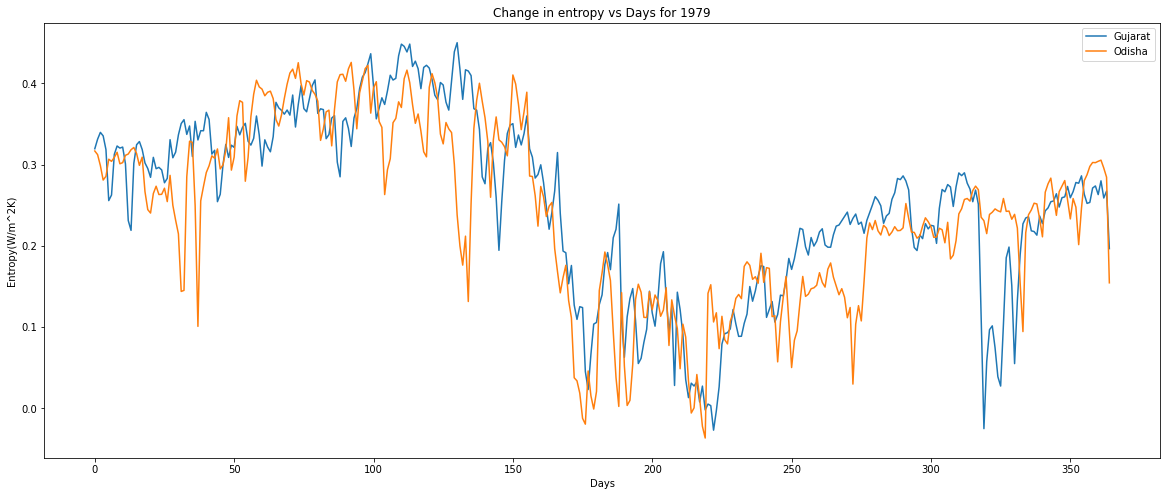

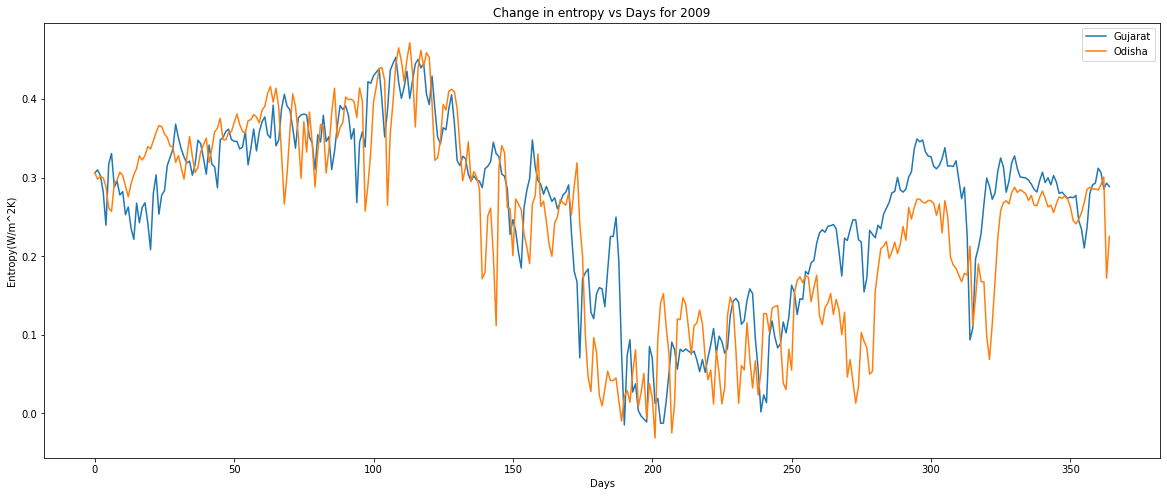

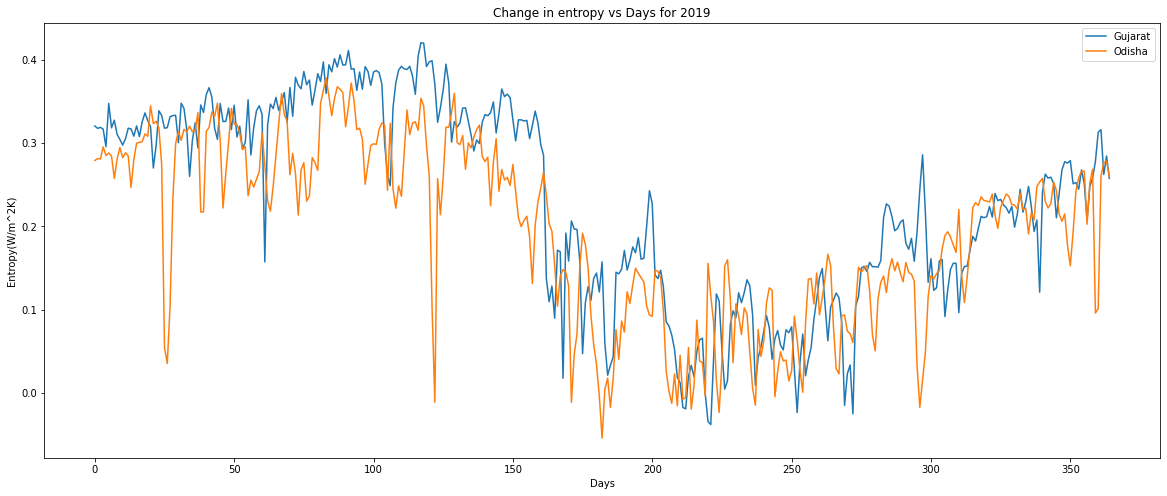

In [8]:
# Running a for loop with specified years
for year in [1979, 2009, 2019]:
    df = pd.read_csv(gujarat_filename,
                 delimiter=' ', header=None) # Reading data file 
    df_selected = df.loc[df[0] == year] # selecting a particular year
    r = compute_parameters(df_selected) # calling the compute_parameters function
    x = [i for i in range(len(df_selected.index))] # Making the data for x-axis
    plt.plot(x, r["ds_dt"]) # Plotting the data into graphs
    
    df = pd.read_csv(odisha_filename,
                     delimiter=' ', header=None)  # Reading data file
    df_selected = df.loc[df[0] == year]  # selecting a particular year
    r = compute_parameters(df_selected)# calling the compute_parameters function
    x = [i for i in range(len(df_selected.index))] # Making the data for x-axis
    plt.plot(x, r["ds_dt"])  # Plotting the data into graphs

    plt.rcParams["figure.figsize"] = (20, 8)
    plt.xlabel("Days")
    plt.ylabel("Entropy(W/m^2K)")
    plt.title("Change in entropy vs Days for "+str(year))
    plt.legend(["Gujarat", "Odisha"])
    plt.show()

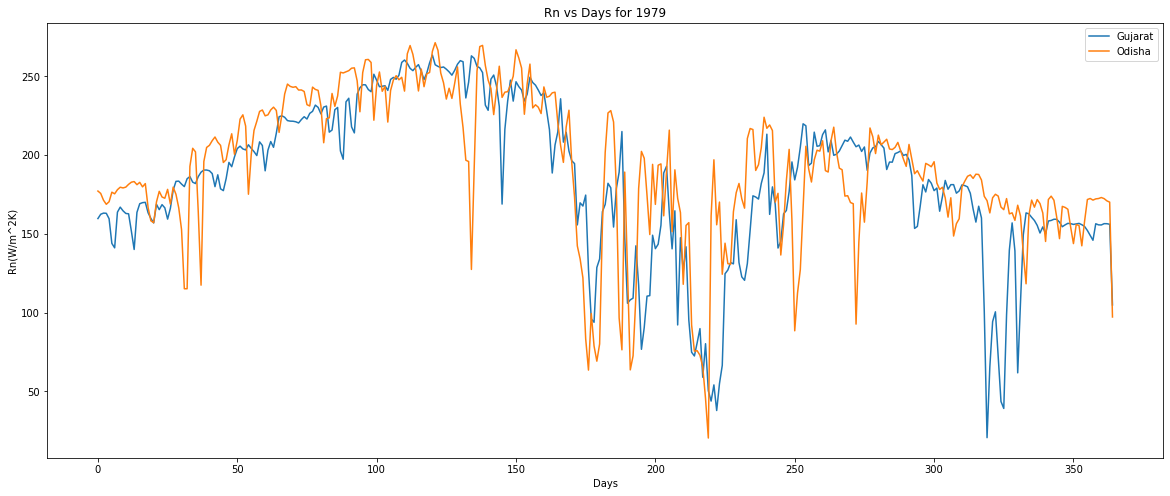

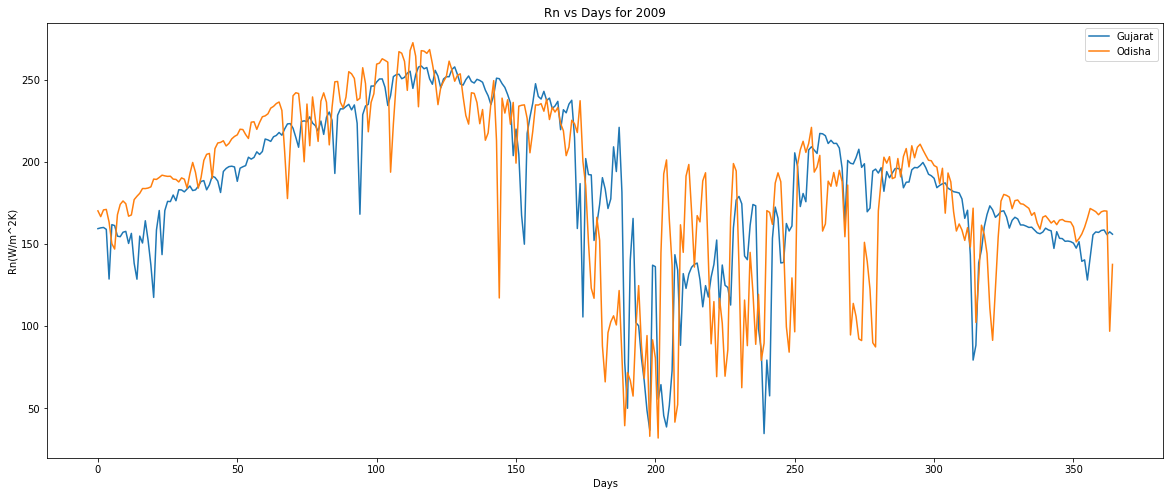

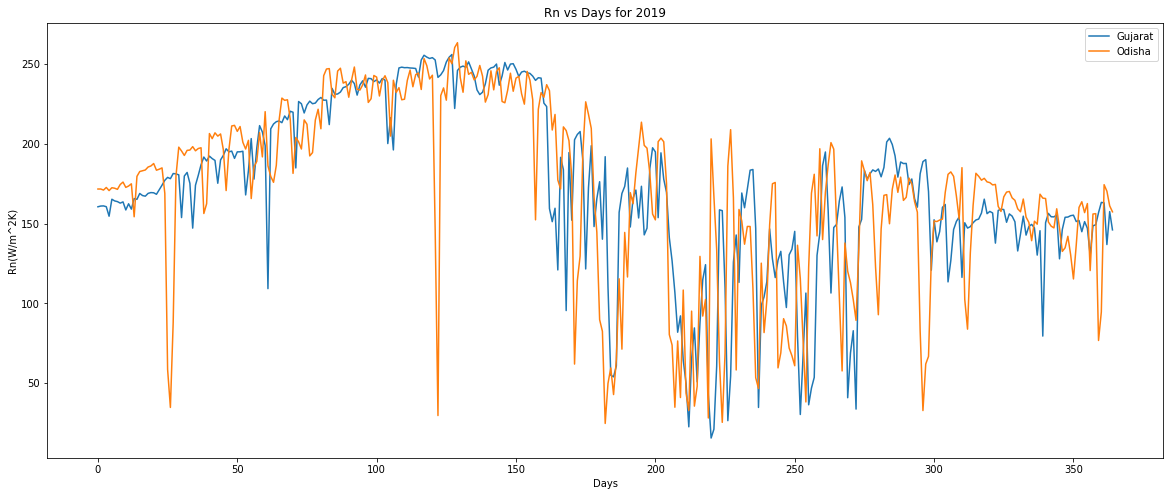

In [7]:
for year in [1979, 2009, 2019]:
    df = pd.read_csv(gujarat_filename,
                 delimiter=' ', header=None)
    df_selected = df.loc[df[0] == year]
    r = compute_parameters(df_selected)
    x = [i for i in range(len(df_selected.index))]
    plt.plot(x, r["Rn"])
    
    df = pd.read_csv(odisha_filename,
                 delimiter=' ', header=None)
    df_selected = df.loc[df[0] == year]
    r = compute_parameters(df_selected)
    x = [i for i in range(len(df_selected.index))]
    plt.plot(x, r["Rn"])

    plt.rcParams["figure.figsize"] = (20, 8)
    plt.xlabel("Days")
    plt.ylabel("Rn(W/m^2K)")
    plt.title("Rn vs Days for "+str(year))
    plt.legend(["Gujarat", "Odisha"])
    plt.show()

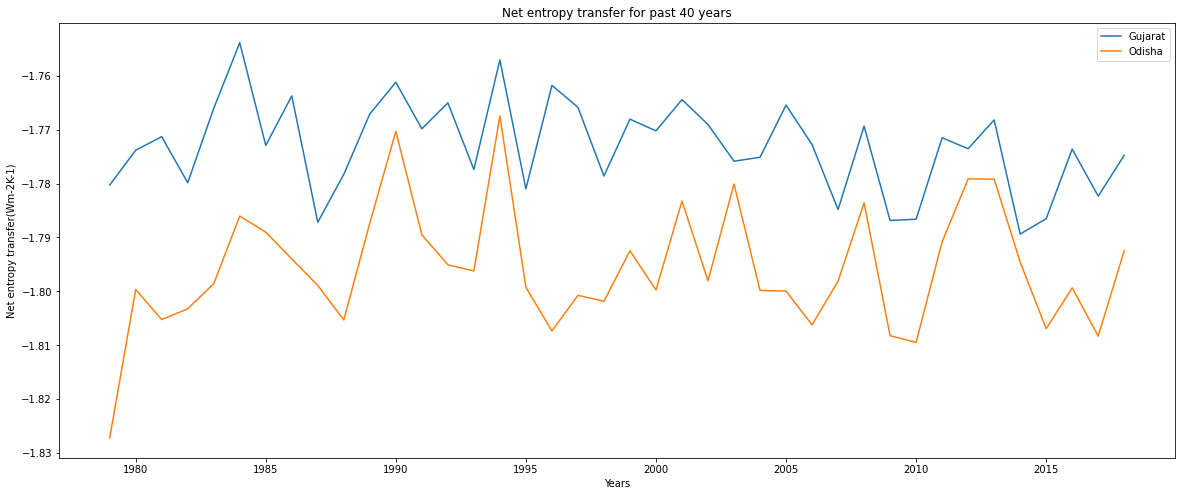

In [8]:
df = pd.read_csv(gujarat_filename,
                 delimiter=' ', header=None)
new_df = pd.DataFrame()
for year in range(1979, 2019):
    r = parseYear(df, year)
    new_df = pd.concat([new_df, pd.DataFrame([r])], ignore_index=True)
x = new_df.index+1979  # Days
r = compute_parameters(new_df)
plt.plot(x, r["J"])

df = pd.read_csv(odisha_filename,
                 delimiter=' ', header=None)
new_df = pd.DataFrame()
for year in range(1979, 2019):
    r = parseYear(df, year)
    new_df = pd.concat([new_df, pd.DataFrame([r])], ignore_index=True)
x = new_df.index+1979  # Days
r = compute_parameters(new_df)
plt.plot(x, r["J"])

plt.rcParams["figure.figsize"] = (10, 6)
plt.xlabel("Years")
plt.ylabel("Net entropy transfer(Wm-2K-1)")
plt.title("Net entropy transfer for past 40 years")
plt.legend(["Gujarat", "Odisha"])

plt.show()

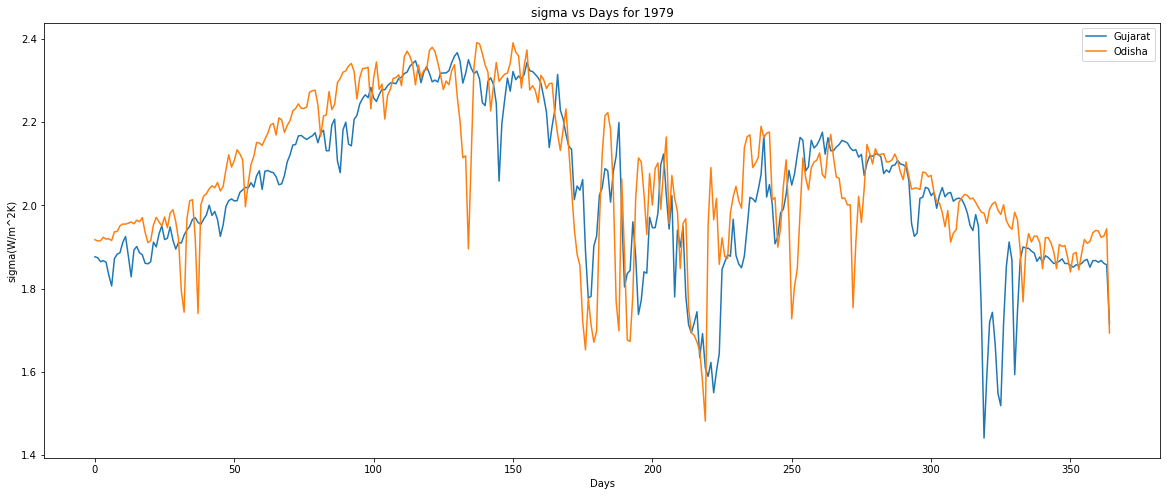

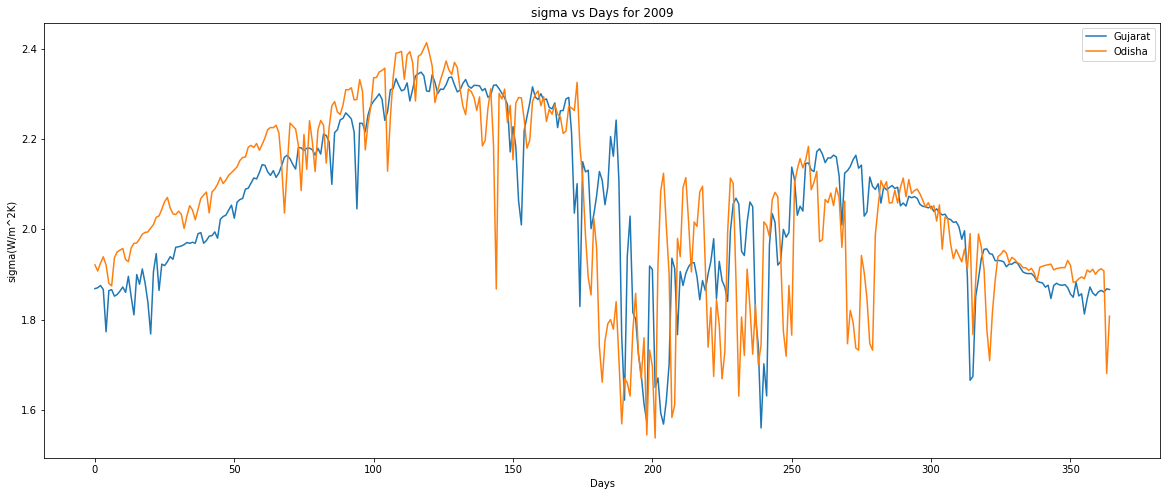

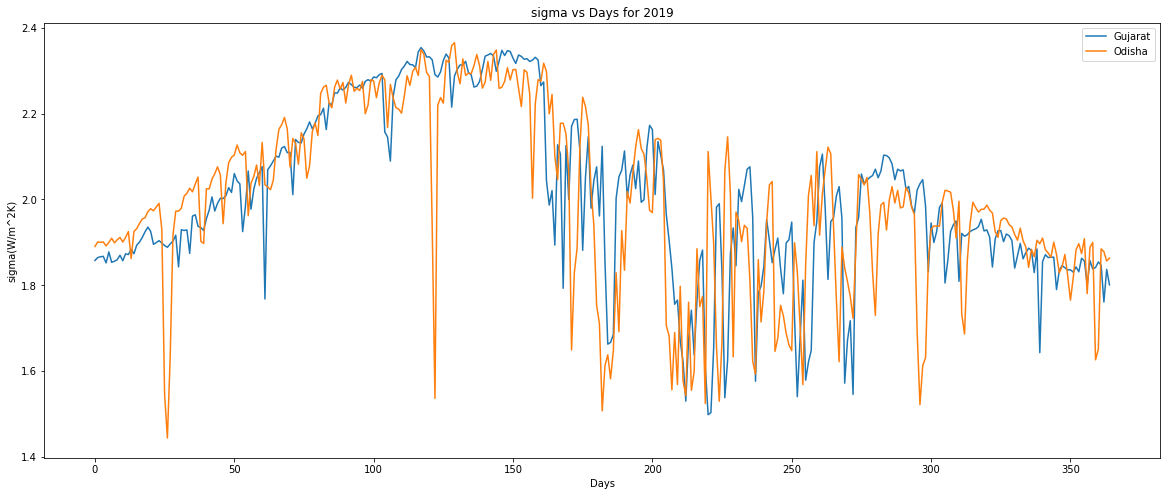

In [10]:
for year in [1979, 2009, 2019]:
    df = pd.read_csv(gujarat_filename,
                 delimiter=' ', header=None)
    df_selected = df.loc[df[0] == year]
    r = compute_parameters(df_selected)
    x = [i for i in range(len(df_selected.index))]
    plt.plot(x, r["sigma"])
    
    df = pd.read_csv(odisha_filename,
                 delimiter=' ', header=None)
    df_selected = df.loc[df[0] == year]
    r = compute_parameters(df_selected)
    x = [i for i in range(len(df_selected.index))]
    plt.plot(x, r["sigma"])

    plt.rcParams["figure.figsize"] = (20, 8)
    plt.xlabel("Days")
    plt.ylabel("sigma(W/m^2K)")
    plt.title("sigma vs Days for "+str(year))
    plt.legend(["Gujarat", "Odisha"])
    plt.show()

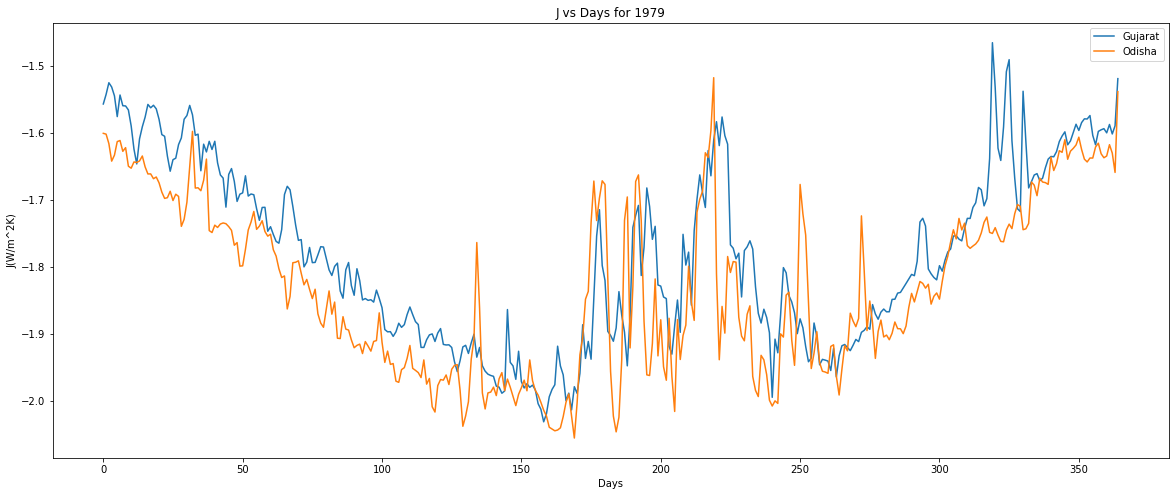

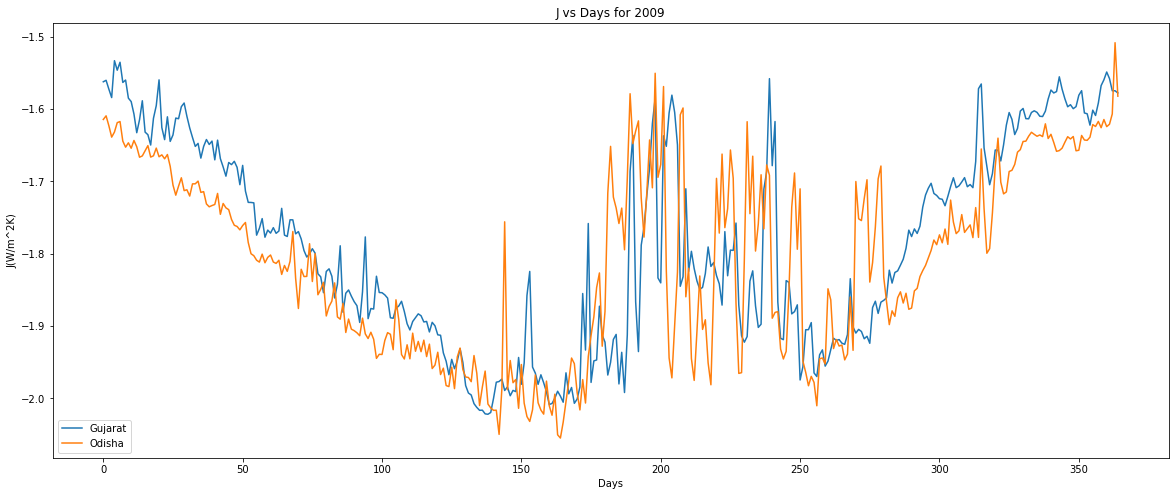

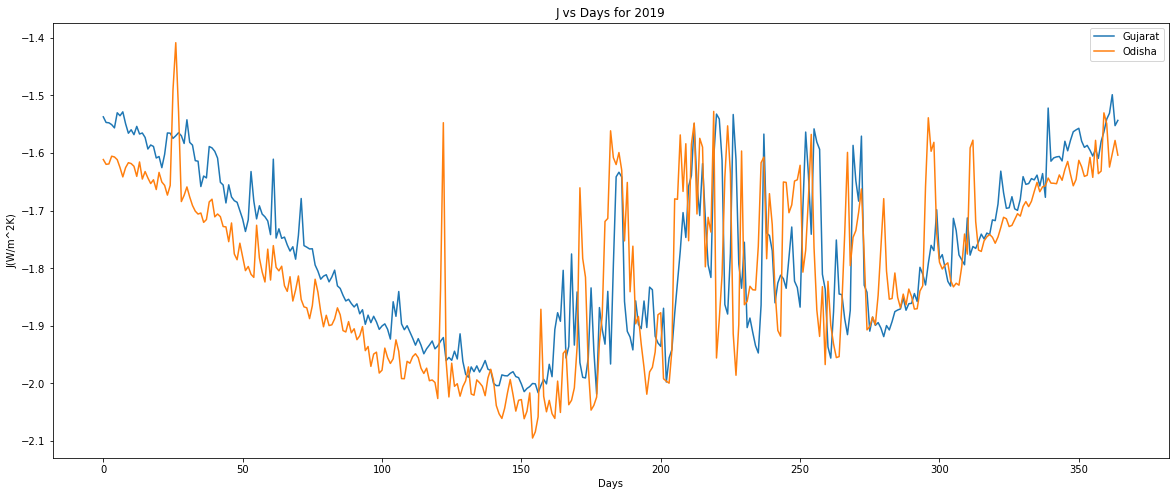

In [11]:
for year in [1979, 2009, 2019]:
    df = pd.read_csv(gujarat_filename,
                 delimiter=' ', header=None)
    df_selected = df.loc[df[0] == year]
    r = compute_parameters(df_selected)
    x = [i for i in range(len(df_selected.index))]
    plt.plot(x, r["J"])
    
    df = pd.read_csv(odisha_filename,
                 delimiter=' ', header=None)
    df_selected = df.loc[df[0] == year]
    r = compute_parameters(df_selected)
    x = [i for i in range(len(df_selected.index))]
    plt.plot(x, r["J"])

    plt.rcParams["figure.figsize"] = (20, 8)
    plt.xlabel("Days")
    plt.ylabel("J(W/m^2K)")
    plt.title("J vs Days for "+str(year))
    plt.legend(["Gujarat", "Odisha"])
    plt.show()

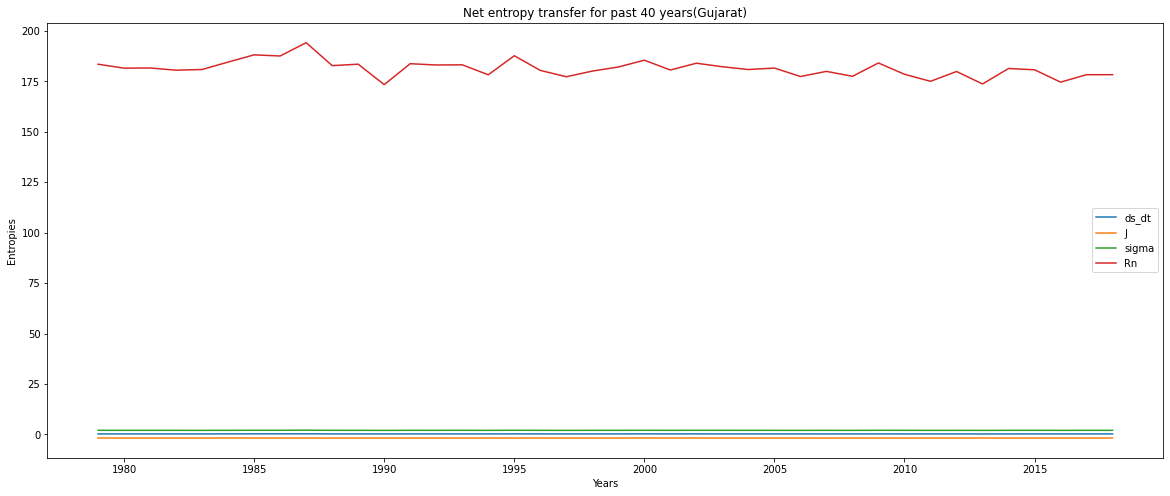

In [12]:
df = pd.read_csv(gujarat_filename,
                 delimiter=' ', header=None)
new_df = pd.DataFrame()
for year in range(1979, 2019):
    r = parseYear(df, year)
    new_df = pd.concat([new_df, pd.DataFrame([r])], ignore_index=True)
x = new_df.index+1979  # Days
r = compute_parameters(new_df)

plt.plot(x, r["ds_dt"])
plt.plot(x, r["J"])
plt.plot(x, r["sigma"])
plt.plot(x, r["Rn"])

plt.rcParams["figure.figsize"] = (10, 6)
plt.xlabel("Years")
plt.ylabel("Entropies")
plt.title("Net entropy transfer for past 40 years(Gujarat)")
plt.legend(["ds_dt", "J", "sigma", "Rn"])

plt.show()

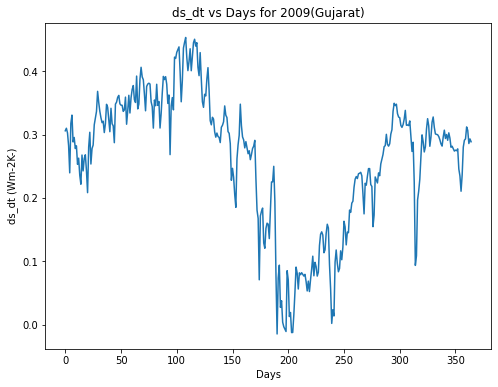

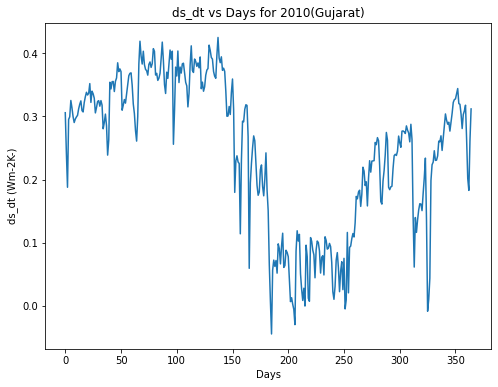

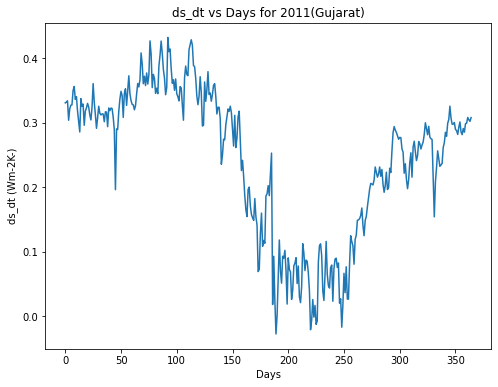

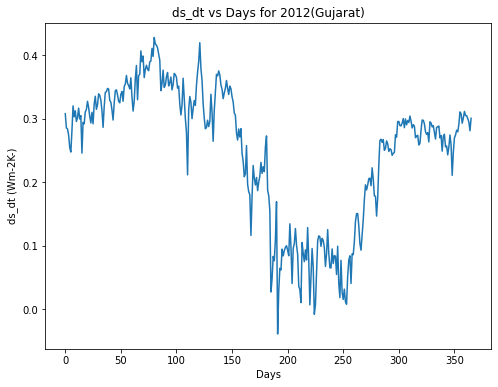

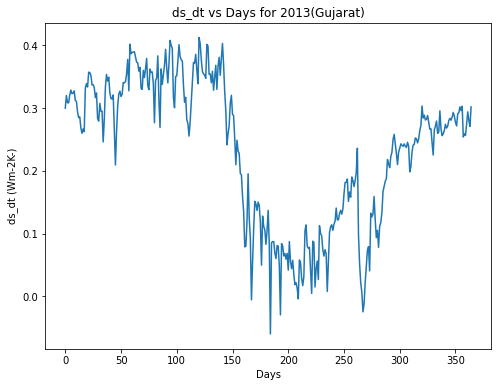

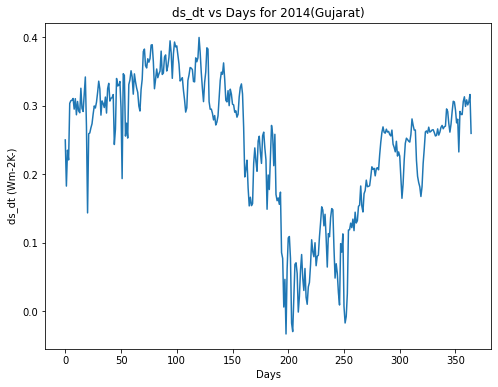

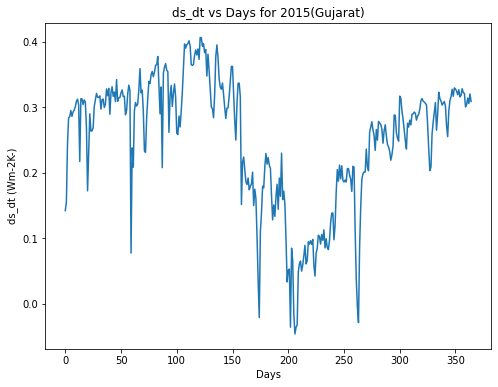

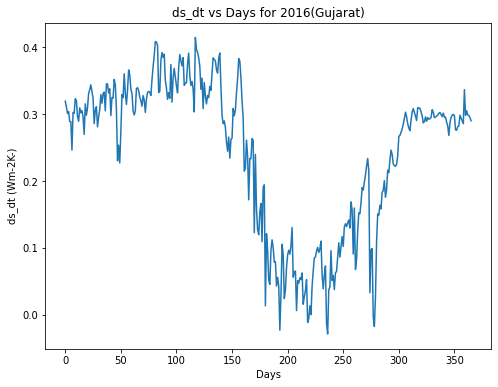

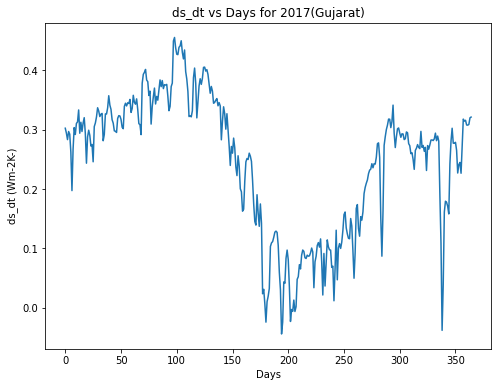

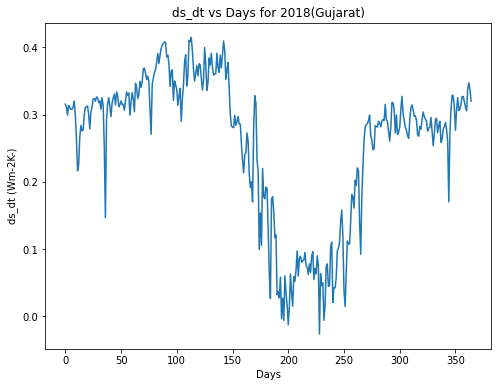

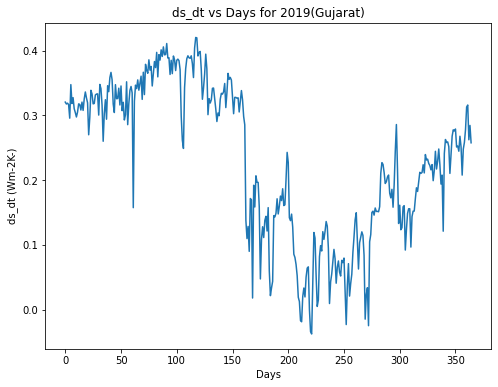

In [14]:
df = pd.read_csv(gujarat_filename,
                 delimiter=' ', header=None)

for year in range(2009, 2020):
    df_selected = df.loc[df[0] == year]
    r = compute_parameters(df_selected)
    x = [i for i in range(len(df_selected.index))]
    plt.rcParams["figure.figsize"] = (8, 6)
    plt.plot(x, r["ds_dt"])
    plt.xlabel("Days")
    plt.ylabel("ds_dt (Wm-2K-)")
    plt.title("ds_dt vs Days for "+str(year)+"(Gujarat)")
    plt.show()


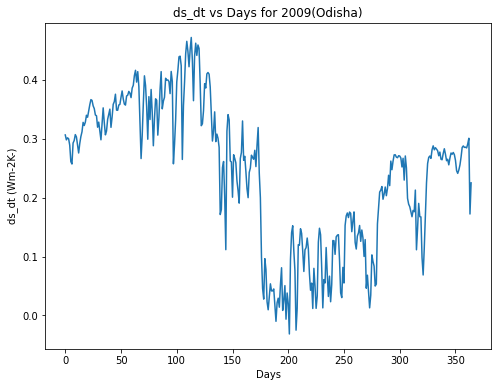

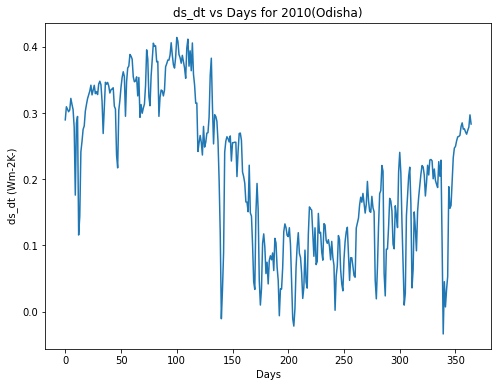

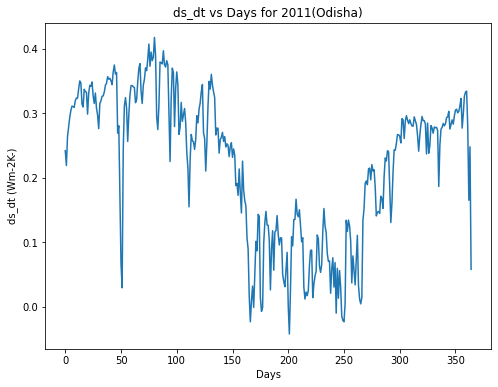

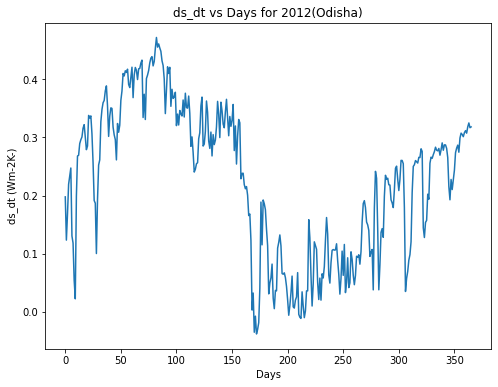

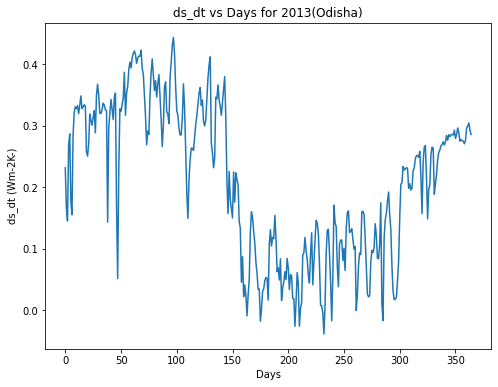

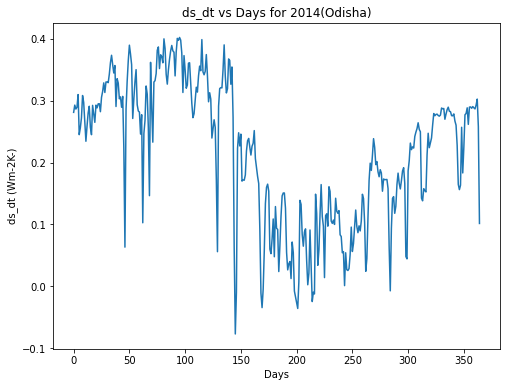

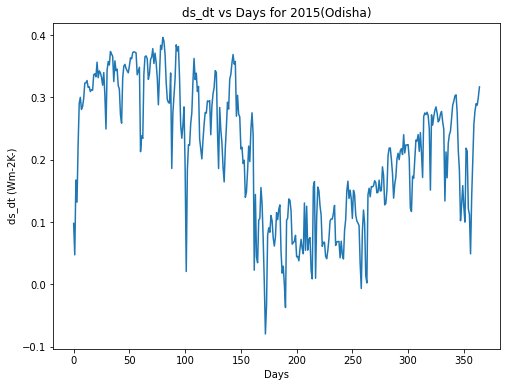

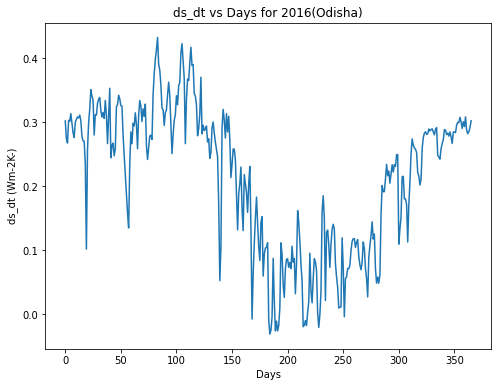

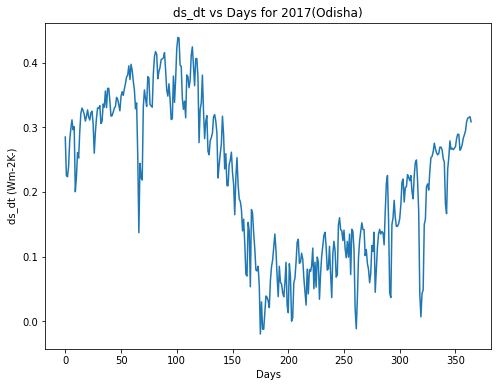

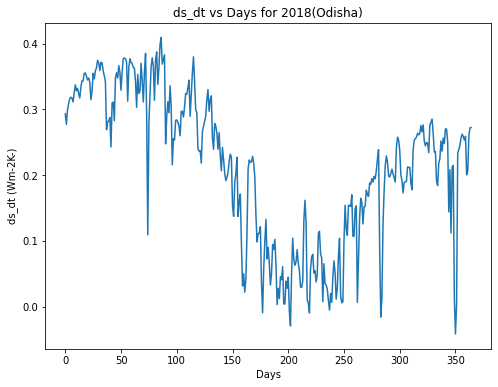

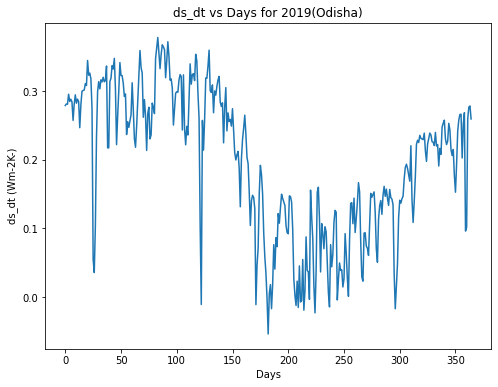

In [15]:
df = pd.read_csv(odisha_filename,
                 delimiter=' ', header=None)

for year in range(2009, 2020):
    df_selected = df.loc[df[0] == year]
    r = compute_parameters(df_selected)
    x = [i for i in range(len(df_selected.index))]
    plt.rcParams["figure.figsize"] = (8, 6)
    plt.plot(x, r["ds_dt"])
    plt.xlabel("Days")
    plt.ylabel("ds_dt (Wm-2K-)")
    plt.title("ds_dt vs Days for "+str(year)+"(Odisha)")
    plt.show()


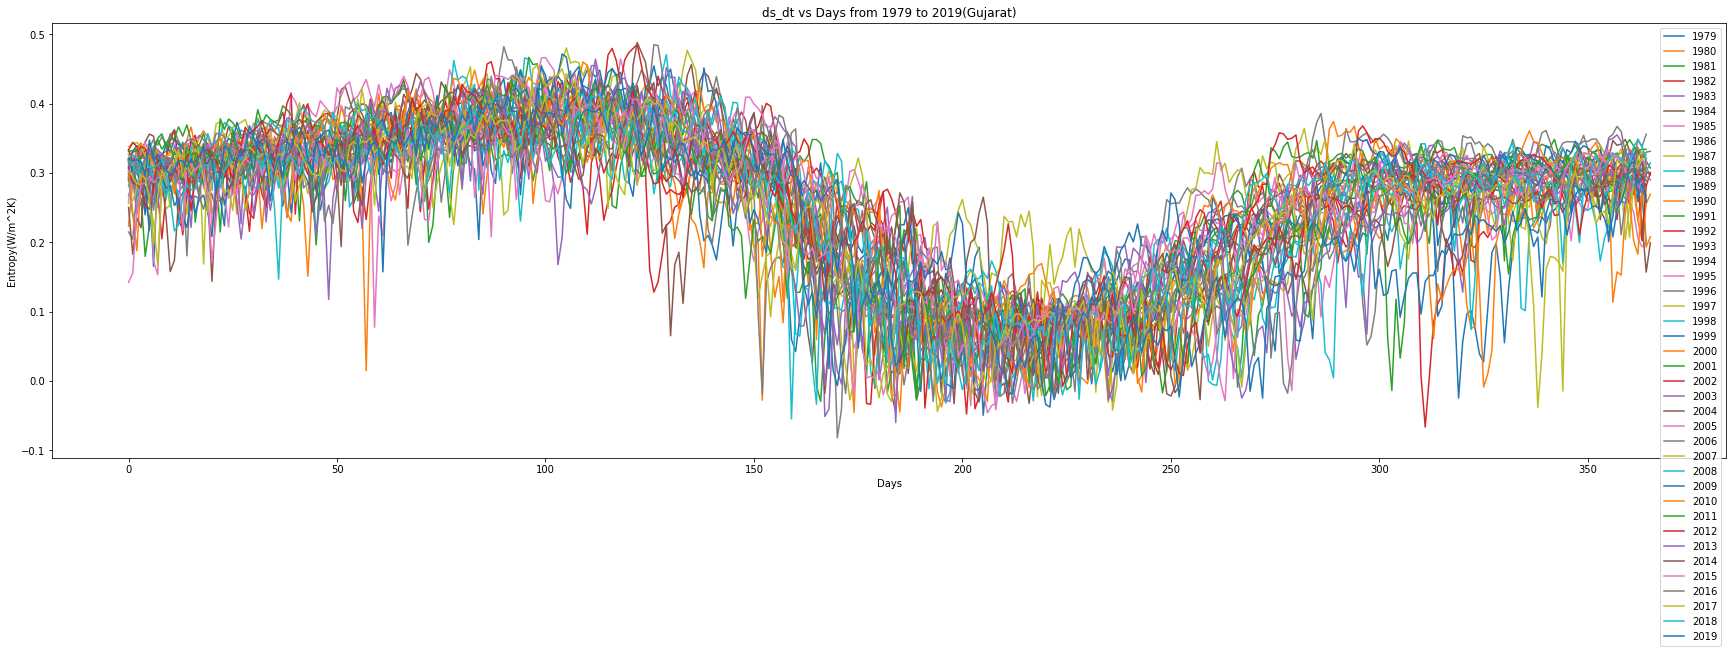

In [19]:
df = pd.read_csv(gujarat_filename,
                 delimiter=' ', header=None)

for year in range(1979, 2020):
    df_selected = df.loc[df[0] == year]
    r = compute_parameters(df_selected)
    x = [i for i in range(len(df_selected.index))]
    plt.plot(x, r["ds_dt"])

plt.rcParams["figure.figsize"] = (30, 8)
plt.xlabel("Days")
plt.ylabel("Entropy(W/m^2K)")
plt.title("ds_dt vs Days from 1979 to 2019(Gujarat)")
plt.legend([1979+i for i in range(41)])
plt.show()


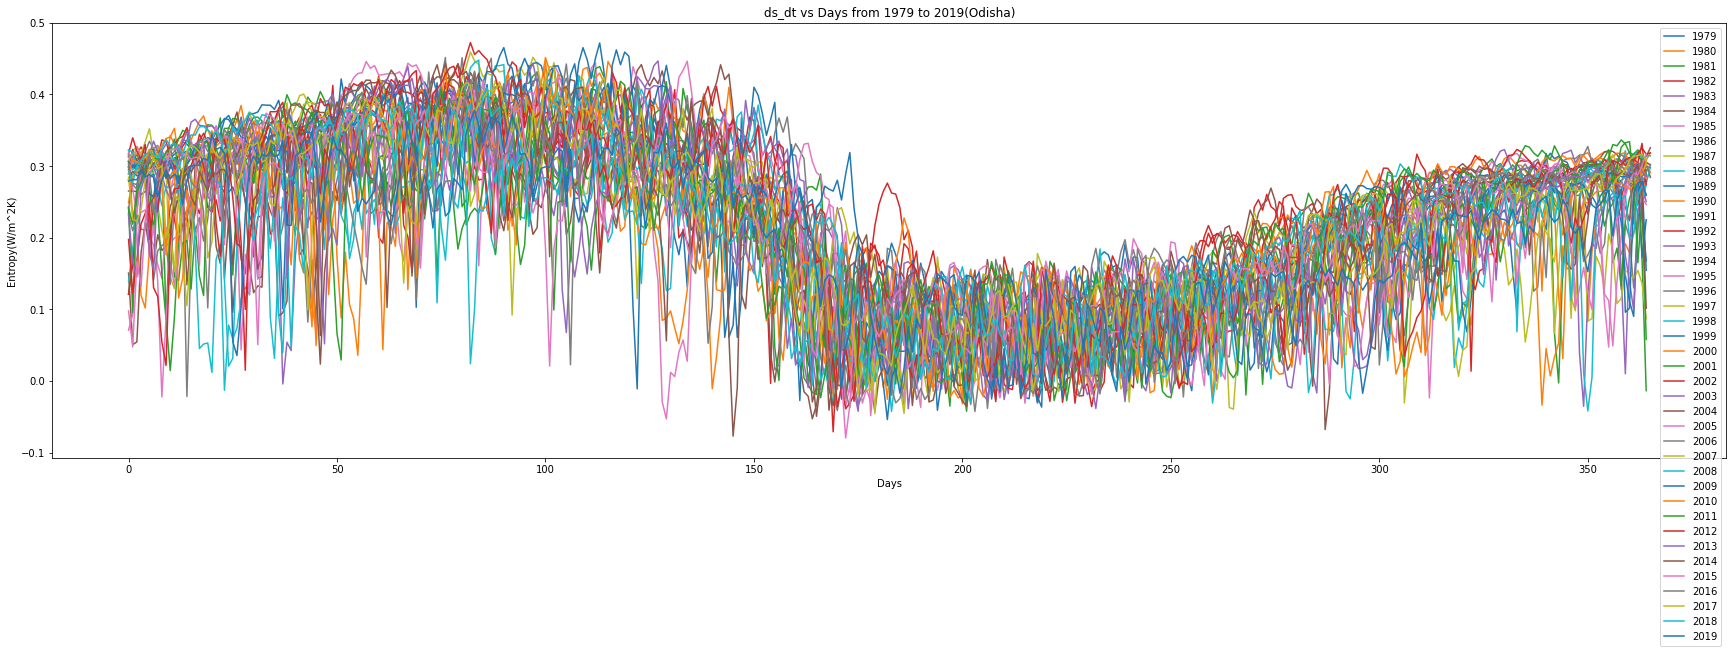

In [18]:
df = pd.read_csv(odisha_filename,
                 delimiter=' ', header=None)

for year in range(1979, 2020):
    df_selected = df.loc[df[0] == year]
    r = compute_parameters(df_selected)
    x = [i for i in range(len(df_selected.index))]
    plt.plot(x, r["ds_dt"])

plt.rcParams["figure.figsize"] = (30, 8)
plt.xlabel("Days")
plt.ylabel("Entropy(W/m^2K)")
plt.title("ds_dt vs Days from 1979 to 2019(Odisha)")
plt.legend([1979+i for i in range(41)])
plt.show()
